## **INTRODUCTION**
Phần đọc lý thuyết thật cảm ơn ban Văn Quang đã trình bày rất dễ hiểu

# **1.Computational Graph**

Đồ thị tính toán(Computational Graph) là một cách hay khi nói về biểu thức tính toán.

    Xét biểu thức e = (a + b) ∗ (b + 1)

Ở đây có 3 toán tử: 2(+) và 1(*).  <br/>
Ta sử dụng những biến trung gian để biểu diễn lại biểu thức c=a+b, d=b+1 

                  e = c * d

Tạo 1 đồ thị tính toán, theo các biến input(a,b) tới các node và giá trị một nút là đầu vào của nút khác. Đặt a = 2 và b = 1. Kết quả e = 6


![](https://i.imgur.com/urjvbKk.png)


---

Ta thử đặt câu hỏi: "Nếu a ảnh hưởng trực tiếp c, và a thay đổi thì liệu c có thay đổi và thay đổi như thế nào?"

Và chúng ta gọi đây là **đạo hàm riêng** của c với đối với a 
<br/>
<br/>
Ta quan sát hình sau:


![](https://i.imgur.com/s42WyKE.png)

Các bạn để ý nếu a thay đổi 1 đơn vị, với điều kiện b được giữ nguyên thì c thay đổi 1 đơn vị. Đây chính là hình ảnh của đạo hàm riêng <br/>
Đến lượt c thay đổi 1 đơn vị, với điều kiện d được giữ nguyên thì khiến e thay đổi 1*2 đơn vị. Đây lại là hình ảnh của đạo hàm riêng 


Đánh giá về đạo hàm riêng trong đồ thị, chúng ta cần tới quy tắc tổng và quy tắc nhân. Nghĩa là quy tắc tổng với tất cả các đường có thể từ 1 node nào đó, và quy tắc nhân với đạo hàm với mỗi đường dẫn vào nhau<br/>
Ví dụ muốn đánh giá b ảnh hưởng như thế nào đối với e ta làm như sau: <br/>

e có 2 ngã vào bị ảnh hưởng bởi b. Giờ xuất phát từ b ta nhân cho đến khi gần tới e, rồi sau đó tổng các hướng đã nhân.

      ∂e/∂b = 1 * 2 + 1 * 3 = 5

> Vậy b thay đổi 1 đơn vị thì e sẽ thay đổi xấp xỉ trên dưới 5 đơn vị. Đó chính là một phần ý nghĩa của đạo hàm riêng. Bạn hãy bỏ túi skill này nhé!!

Đến đây chắc hẳn có nhiều bạn cũng chưa hiểu **Computational Graph nếu áp dụng vào network** như thế nào?
Mục đích của ta là thay đổi hay tác động đến các trọng số W để làm cho L thay đổi và thay đổi về giá trị nhỏ nhất. Ở đây người ta dùng phương pháp Reverse-mode differentiation thay vì Forward-mode differentiation trong đạo hàm riêng. Hoặc nói một cái tên thân thương là: Backpropagation. 

Vì sao vậy? Đáp án ngay dưới đây 

**Forward-mode differentiation** từ b lên. Điều này cho chúng ta đạo hàm tại mỗi node với sự tác động của **b và chỉ b**

![](https://i.imgur.com/3j2x8yy.png)


**Reverse-mode differentiation** từ e xuống? Điều này cho chúng ta đạo hàm của e với sự tác động tới mỗi node với sự tác động của a và b. Ý tôi là nhận được cả ∂e/∂a và ∂e/∂b => Quá đã

![](https://i.imgur.com/375b9Yj.png)


Kết luận: 

> Reverse-mode differentiation thực hiện đạo hàm của e đối với các node và ta nhận được cả ∂e/∂a và ∂e/∂b<br/>
Trong khi đó Forward-mode differentiation đã cho chúng ta đạo hàm của output với sự tác động của **chỉ 1 input**, nhưng reverse-mode differentiation cho chúng ta tất cả chúng.
Ta thử tưởng tượng 1 hàm với 1 triệu input và 1 output. Forward-mode differentiation sẽ yêu cầu nó quẹo vòng qua đồ thị 1 triệu lần để nhận được các đạo hàm. Reverse-mode differentiation có thể nhận tất cả chúng chỉ với 1 lần.

Computational Graph giúp có thể dễ dàng minh họa trực quan tính đạo hàm cho các biến và để hiểu sâu về neural network, hay xa hơn là các mô hình deep learning, thì việc hiểu rõ Computational Graph này mang lại rất nhiều hữu ích cho các bạn.

Tham khảo: 

1.   https://aivietnam.ai/courses/aisummer2019/lessons/computational-graph/
2.   https://colah.github.io/posts/2015-08-Backprop/

#**2.LinearRegression**

# **3.BÀI TẬP**

#### **Class LinearRegresstion**
sử dụng cho các bài toán

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegresstion:
   
    
    def __init__(self, data, rate, epochs = 100, miniBatchSize = None):
        self.data, self.coefficient = self.getNomal(data[:].copy())
        self.features = self.data[:, :-1]
        self.y = self.data[:, -1:]
        self.rate = rate
        self.epochs = epochs
        self.w = np.random.rand(self.features.shape[1], self.y.shape[1])
        self.b = np.random.rand(1)
        self.nData = self.features.shape[0]
        self.miniBatchSize = miniBatchSize
        self.losses = []

    def getNomal(self, data):
        maxi = np.max(data, axis = 0)
        mini = np.min(data, axis = 0)
        avg = np.mean(data, axis = 0)
        return (data-avg) / (maxi-mini), (maxi, mini, avg)
    
    def run(self):
        if (self.miniBatchSize == None):
            self.miniBatchSize = self.nData
            
        for epoch in range(self.epochs):

                iIndex = np.random.randint(0, self.nData, size=(self.miniBatchSize,))
                xi = self.features[iIndex]
                yi = self.y[iIndex]
                
                predict = self.features[iIndex].dot(self.w) + self.b
                
                loss = 1/2 * (predict - yi)**2
                self.losses.append(loss.mean())

                loss_grd = (predict - yi)/self.miniBatchSize
                self.w -= self.rate * xi.T.dot(loss_grd)
                self.b -= self.rate * np.sum(loss_grd)
                
    def showLossGraph(self):
        plt.plot(self.losses, 'r')
        plt.show()

def loadFile(path):
    return np.genfromtxt(path, delimiter=',', skip_header=1)

#### **Dataset**: [Here](https://drive.google.com/drive/folders/1SXm_OLjXVdzt0_UJIAHZl04RlJTXC_V9?usp=sharing)

#### **a) BostonHousing**

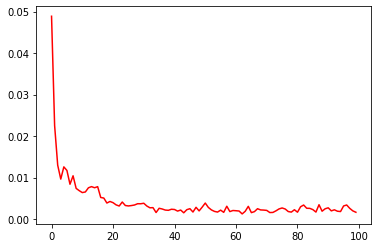

In [ ]:
from google.colab import auth
auth.authenticate_user()

from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
#đây là chuỗi ký tự chữ và số dài xuất hiện khi bạn nhấp vào "lấy liên kết để chia sẻ ảnh trong Google Drive"
drive = GoogleDrive(gauth)

#Lấy file từ google drive của tôi chia sẻ theo với ID và đường Link được mã hóa bằng chuối số 
myfile = drive.CreateFile({'id': '1QF_nVOBqXaVZoEBbVMTg6g3eCHYVPjcR'})
myfile.GetContentFile('advertising.csv')

data = loadFile('advertising.csv')


myObject = LinearRegresstion(data, 1.5, epochs = 100, miniBatchSize = 64)
myObject.run()
myObject.showLossGraph()

#### **b) Advertising**

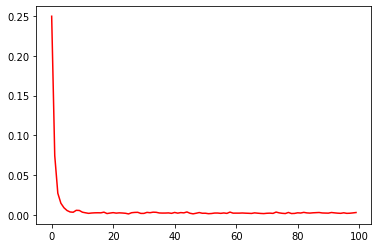

In [ ]:
#Lấy file từ google drive của tôi chia sẻ theo với ID và đường Link được mã hóa bằng chuối số 
myfile = drive.CreateFile({'id': '1QF_nVOBqXaVZoEBbVMTg6g3eCHYVPjcR'})
myfile.GetContentFile('advertising.csv')
data = loadFile('advertising.csv')
myObject = LinearRegresstion(data, 1.5, epochs = 100, miniBatchSize = 64)
myObject.run()
myObject.showLossGraph()

#### **c) Giá nhà**

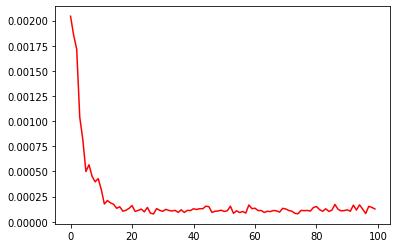

In [ ]:
#Lấy file từ google drive của tôi chia sẻ theo với ID và đường Link được mã hóa bằng chuối số 
myfile = drive.CreateFile({'id': '1q1fqOMQHBqxCKMB1UsjeFk8Qkan9LgbQ'})
myfile.GetContentFile('pricebyarea.csv')
data = loadFile('pricebyarea.csv')

myObject = LinearRegresstion(data, 1.5, epochs = 100, miniBatchSize = 64)
myObject.run()
myObject.showLossGraph()